# Certamen Módulo Machine Learning

fecha: 28-enero-2019

Profesor: Sebastián Niklitschek-Soto

**Indicaciones:** Responda a las preguntas de la manera más clara posible. Dos elementos deben ser enviados como solución a los problemas propuestos:
* El cuaderno de jupyter con toda su implementación, resultados, comentarios y respuestas a las preguntas teóricas. Esta versión debe ser replicable.
* La versión pdf del cuaderno de jupyter.
La prueba tiene un total de 60 puntos, el puntaje de cada pregunta es explicitado junto a su numeración.

## Problema 1 (5 puntos c/u):
Contraste y explique los siguientes conceptos, utilizando ejemplos para apoyar su explicación cuando sea pertinente:

* Aprendizaje supervisado vs Aprendizaje no supervisado;

El aprendizaje supervisado es un paradigma de aprendizaje que consiste en el entrenamiento de modelos con el uso de una etiqueta, es decir, se le muestra al modelo la variable respuesta para cada subconjunto de datos, y se evalúa en base a esa variable, calculando una medida de error. Un ejemplo de estos puede ser el problema de clasificar imagenes, donde ya se posee un conjunto de datos con etiquetas de imagenes que servirán para entrenar y validar el modelo
Por otro lado, el aprendizaje no supervisado es otro paradigma de aprendizaje en el cual no se posee una etiqueta como respuesta a un conjunto de variables. De esta manera, el modelo de machine learning tienen que entrenarse a partir de solo los datos. Un ejemplo de esto son los problemas de clustering, en los cuales se agrupan variables creando diferentes agrupaciones en las que estas variables compartan características similares, este método se puede encontrar en los mpetodos de recomendación presentes en diferentes servicios de entretenimiento y e-commerce.


* Validación cruzada en k-grupos vs entrenamiento/prueba;

La valudación cruzada consiste en dividir aleatoriamente el conjunto de datos en sub-conjuntos de entrenamiento y sub-conjunto de prueba. Luego se entrena el modelo de machine learning y se evalúa. Se repite este proceso, creando un nuevo subconjunto de entrenamiento y sub-comjunto de prueba diferentes al anterior. El proceso se repite K-veces para evaluar el rendimiento del modelo.
El entrenamiento/prueba consiste en crear un conjunto de entrenamiento y un conjunto de prueba para entrenar una vez un metodo de machine learning y luego probarlo, luego se mide su desempeño utilizando alguna medida de error.
Se espera que utilizando validación cruzada, se pueda obtener un mejor rendimiento para el modelo analizado.


* Clustering jerárquico vs k-medias.

El clustering jerarquico es un metodo para hacer clustering en el cual se construye una jerarquía de grupos. La idea es realizar divisiones entre los grupos a partir de una jerarquía, para poder asi agrupar las variables en distintos clusters.
El metodo de K-medias es un método para hacer clustering y consiste en dividir un conjunto de datos en k grupos en el que cada dato del conjunto principal pertenece al sub-conjunto cuyo centroide es más cercano


## Problema 2 (20 puntos, 2-4-6-6-2):
El desarrollo de este problema se hará bajo el enfoque de aprendizaje no supervisado. Para ello, trabajará con el conjunto de datos "Problema2.csv", que corresponde a información de distintos pacientes, donde cada uno está representado en el conjunto de datos mediante atributos biomecánicos derivados de la forma y la orientación de la pelvis y la columna lumbar. Se le solicita:
* Determinar el número de pacientes incorporados en la muestra y el número de características utilizado para describir a cada uno.
* Realice un resumen de las variables para toda la muestra. Comente.
* Utilice alguna técnica de clústering para descubrir grupos de individuos. ¿Cuántos grupos identifica? Justifique.
* Describa los grupos generados. 
* En este contexto, ¿qué utilidad podría encontrar a lo realizado? Discuta.



## Problema 3 (25 puntos, 3-3-8-8-3):
El objetivo de este ejercicio será entrenar métodos de clasificación, bajo el paradigma de aprendizaje supervisado, para clasificar imágenes en el contexto de verificación de identidad. Para ello, trabajará con el conjunto de datos "Problema3.csv" el cual contiene información ya codificada de varias fotografías de diferentes personas junto con una etiqueta que da cuenta de la persona a la que la fotografía pertenece. Se le solicita lo siguiente:
* Determine el número de individuos distintos representados en el conjunto de datos. Además suponiendo que las imágenes son cuadradas, ¿de qué tamaño son?
* Grafique al menos cuatro imágenes para al menos cuatro individuos en un mismo gráfico.
* Entrene el modelo de árboles de decisión, evaluando su rendimiento mediante validación cruzara en 5 grupos y úsela además para calibrar algún parámetro del modelo.
* Repita lo anterior para el método de bosques aleatorios. ¿Cuál entregó mejores resultados? ¿Qué medida de desempeño escogió?
* Dibuje la curva ROC e interprete.

# Anexo:

Aquí encontrará algunas de las instrucciones que le permitirán importar los diferentes clasificadores.


In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import get_scorer
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# Pregunta 2

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Pregunta 2.1

In [31]:
#Leer datos
data = pd.read_csv("Problema2.csv", header = 1, sep = ",")

#Borrar columnas innecesarias
data = data.drop(['esta columna es basura'], axis = 1)
data = data.drop(['0'],axis = 1)

In [69]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501


In [75]:
np.shape(data)

(310, 6)

# Respuesta: Se tienen 310 pacientes y 6 características

# Pregunta 2.2

In [42]:
#Describir los datos
data.describe()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082


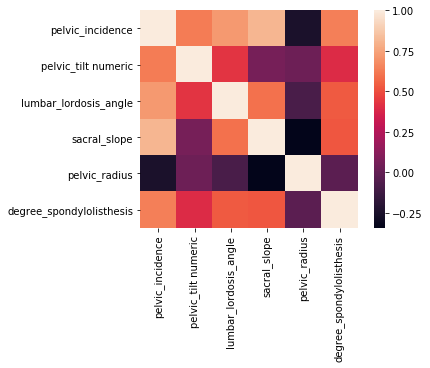

In [41]:
#Visualizar correlaciones entre variables
correlacion = data.corr()
sns.heatmap(correlacion, square = True)

# Pregunta 2.3

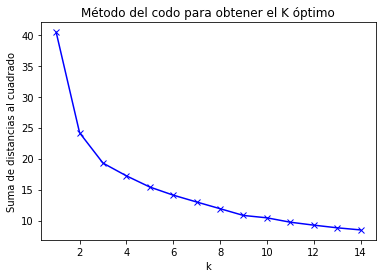

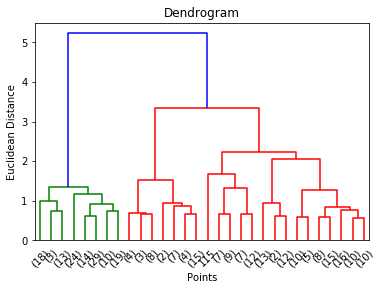

In [51]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

#Se escalan los datos antes de visualizar
scaler = MinMaxScaler()
data_transformed = scaler.fit_transform(data)

#Se aplica el método KMeans y se calcula la inercia
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

    
#Se grafica la inercia para calcular el numero de clusters óptimo usando el método del codo
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Suma de distancias al cuadrado')
plt.title('Método del codo para obtener el K óptimo')
plt.show()

#Se grafica un dendograma para verificar lo anterior
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(data_transformed, metric='euclidean', method='ward')
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Euclidean Distance')

#Se genera el dendograma
dendrogram(Z, truncate_mode='lastp')
plt.show()

# Respuesta: A partir del método del codo y del dendograma, se ve que hay 3 clusters en el conjunto de datos 

# Pregunta 2.4

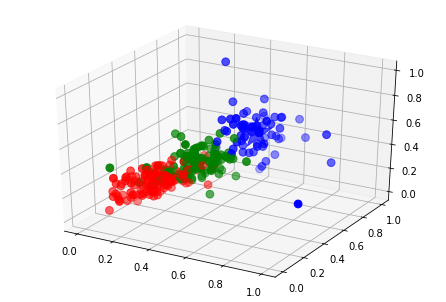

In [59]:
#Entrenando el modelo Kmean
km = KMeans(n_clusters = 3)
km.fit(data_transformed)

#Prediciondo clusters
labels = km.predict(data_transformed)

# Calculando los centroides
C = km.cluster_centers_

#Graficando
from mpl_toolkits.mplot3d import Axes3D
colores=['red','green','blue',]
asignar=[]
for row in labels:
    asignar.append(colores[row])
 

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_transformed[:, 0], data_transformed[:, 1], data_transformed[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)



# Pregunta 2.5

# Respuesta

Dado que sería muy complejo y costoso crear un tratamiento medico diferente para cada uno de los pacientes, con esta información se podría agrupar pacientes en diferentes clusters con el fin de crear un tratamiento para cada tipo de cluster, que logre ser adecuado a los problemas en común que tienen los pacientes agrupados en el musmo cluster. De esta manera, se entrega un tratamiento adecuado de manera rápida y eficiente.

# Pregunta 3

# Pregunta 3.1

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

#LEER DATOS
datos = pd.read_csv("Problema3.csv", sep = ",")
datos['lbls'] = np.append(0,datos['lbls'].values)[:-1]

In [171]:
np.shape(datos)

(400, 4098)

In [229]:
#Borrar columnas innecesarias
datos = datos.drop(['Unnamed: 0'], axis = 1)

In [174]:
datos.head()

,0,1,2,3,4,5,6,7,8,9,...,4087,4088,4089,4090,4091,4092,4093,4094,4095,lbls
0,0.309917,0.367769,0.417355,0.442149,0.528926,0.607438,0.657025,0.677686,0.690083,0.685950,...,0.669421,0.652893,0.661157,0.475207,0.132231,0.148760,0.152893,0.161157,0.157025,0.0
1,0.454545,0.471074,0.512397,0.557851,0.595041,0.640496,0.681818,0.702479,0.710744,0.702479,...,0.157025,0.136364,0.148760,0.152893,0.152893,0.152893,0.152893,0.152893,0.152893,0.0
2,0.318182,0.400826,0.491736,0.528926,0.586777,0.657025,0.681818,0.685950,0.702479,0.698347,...,0.132231,0.181818,0.136364,0.128099,0.148760,0.144628,0.140496,0.148760,0.152893,0.0
3,0.198347,0.194215,0.194215,0.194215,0.190083,0.190083,0.243802,0.404959,0.483471,0.516529,...,0.636364,0.657025,0.685950,0.727273,0.743802,0.764463,0.752066,0.752066,0.739669,0.0
4,0.500000,0.545455,0.582645,0.623967,0.648760,0.690083,0.694215,0.714876,0.723140,0.731405,...,0.161157,0.177686,0.173554,0.177686,0.177686,0.177686,0.177686,0.173554,0.173554,0.0


In [175]:
np.shape(datos)

(400, 4097)

# Respuesta

print("A partir de la columna label se tienen 40 personas")
fotos = np.sqrt(len(datos.columns)-1)
print("Quitando la columna id y label, se tienen 4096 columnas. Por lo tanto el numero de fotos es: ",fotos)

# Pregunta 3.2

In [230]:
#Se separan los valores de sus respectivas etiquetas
x = datos.iloc[:,0:4096].values
y = datos.iloc[:,4096].values

persona1


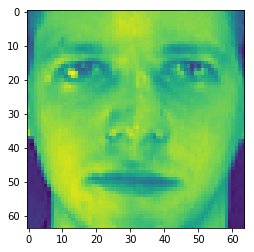

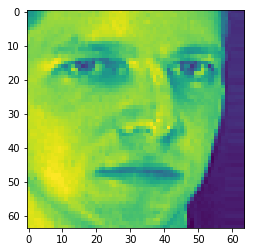

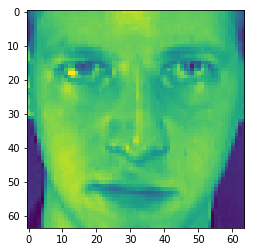

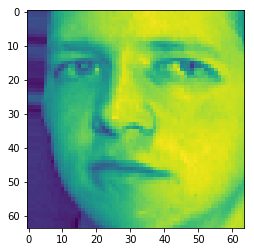

persona2


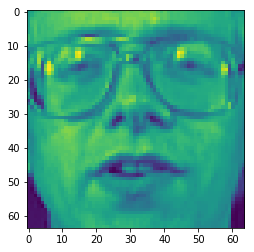

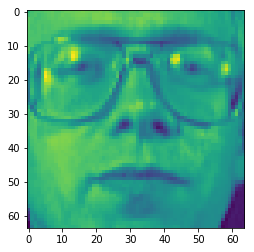

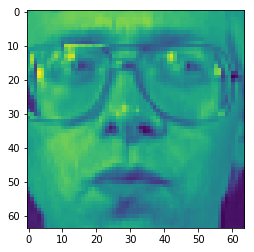

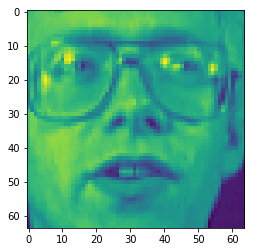

persona3


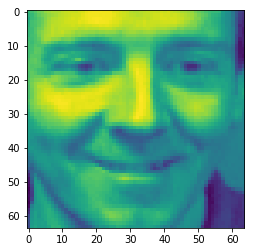

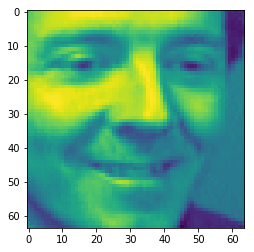

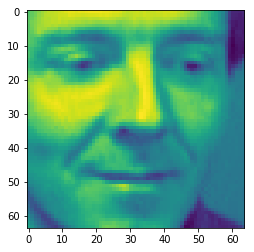

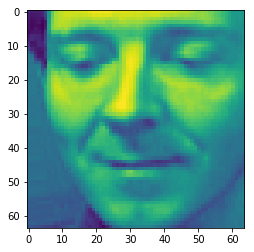

persona4


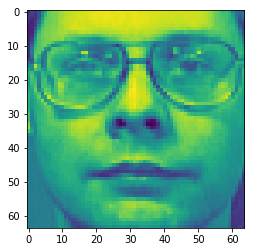

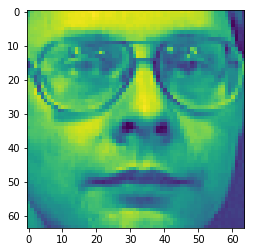

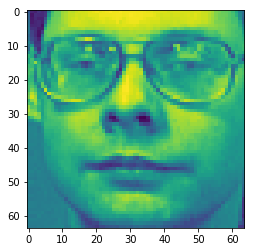

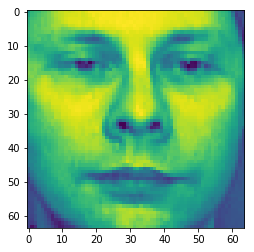

In [265]:
#Se grafican 4 fotos para 4 personas, cada una tomando una fila de la matriz, 
#luego convirtiendo la fila en matriz, y luego esta matriz en una foto
print("persona1") 

for i in range(0,4):
    foto1 = x[i,:]
    foto = np.reshape(foto1,(64,64))
    imgplot = plt.imshow(foto)
    plt.show()

print("persona2") 

for i in range(10,14):
    foto1 = x[i,:]
    foto = np.reshape(foto1,(64,64))
    imgplot = plt.imshow(foto)
    plt.show()
    
print("persona3") 

for i in range(20,24):
    foto1 = x[i,:]
    foto = np.reshape(foto1,(64,64))
    imgplot = plt.imshow(foto)
    plt.show()

print("persona4") 

for i in range(30,34):
    foto1 = x[i,:]
    foto = np.reshape(foto1,(64,64))
    imgplot = plt.imshow(foto)
    plt.show()
    

# Pregunta 3.3

In [231]:
#Se generan los conjuntos de entrenamiento y de prueba
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.20, random_state=42)

In [238]:
#Se entrena el modelo con Arbol de desición y se evalúa con validación cruzada
scores1 = cross_val_score(DecisionTreeClassifier(random_state = 10), x_train, y_train, 
                         cv=KFold(n_splits=5, random_state=42), 
                         scoring="accuracy")

print("La precisión media en el arbol de desicion por validación cruzada es:", scores1.mean())

La precisión media en el arbol de desicion por validación cruzada es: 0.4625


# Pregunta 3.4

In [239]:
#Se entrena el modelo con Bosques aleatorios y se evalúa con validación cruzada
scores2 = cross_val_score(RandomForestClassifier(n_estimators=400, random_state = 10), x_train, y_train, 
                         cv=KFold(n_splits=5, random_state=42), 
                         scoring="accuracy")

print("La precisión media en Random forest por validación cruzada es:", scores2.mean())

La precisión media en Random forest por validación cruzada es: 0.878125


# Respuesta: Para ambos métodos se eligió como medida de desempeño la precisión. Se ve que al usar validación cruzada, el método de bosques aleatorios entrega un mejor resultado que el método de arbol de desición

# Pregunta 3.5

In [264]:
from sklearn import metrics

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train) 
y_pred_prob = clf.predict_proba(x_test)[:, 1]
fpr, tpr = metrics.roc_curve(y_test, y_pred_prob)


"""
plt.plot(fpr, tpr)
plt.xlabel("Falsos positivos")
plt.ylabel("Verdaderos positivos")
plt.show()
"""

ValueError: multiclass format is not supported